In [5]:
import pandas as pd
pd.__version__

'1.0.1'

In [6]:
# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

In [3]:
df = pd.read_csv('data/goog.csv' , index_col='Date' , parse_dates=True )

* ``Conditionsl`` Data Frames

In [18]:
df[df['High'] == df['Close']].head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-04-29,269.73,271.78,268.99,271.78,NaN
2011-10-13,274.74,279.22,273.74,279.22,NaN
2011-11-03,293.21,298.45,291.57,298.45,NaN
2012-06-22,283.72,285.45,282.63,285.45,NaN
2013-07-12,459.54,461.04,457.16,461.04,NaN


In [19]:
# to filtering out the missing data

df_filtered = df[pd.isnull(df['Volume']) == False]
df_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


In [21]:
# daily percentage change
df['Return'] = df['Close'].pct_change()
df['Return'].head()

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [23]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
df['LogReturn'] = np.log(1+df['Return'])

In [24]:
google = df

In [25]:
google['LogReturn'].head()

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

NameError: name 'plt' is not defined

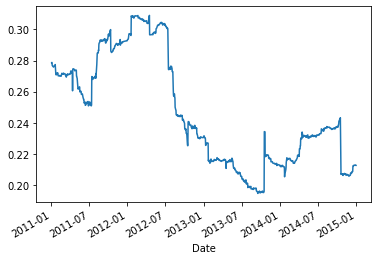

In [30]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

google['Volatility'].plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000194BF0C8C88>,
      dtype=object)

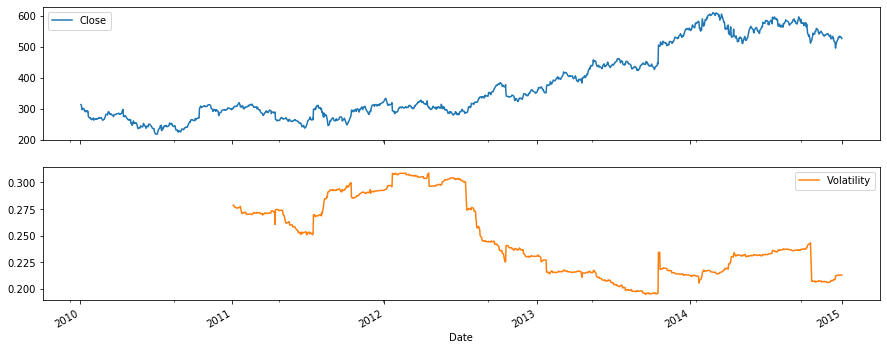

In [31]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

In [35]:
# Numerical computing
import numpy as np
# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline
# Python people are weird!
import pandas as pd
# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8
# Check version number
pd.__version__

'1.0.1'

In [36]:
file   = "data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']
# pd.series method gives some sort of index to the given list
# dict also can be converted to pd sereis also

### example of creating series from np array

In [37]:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

In [38]:
series1.index
# The Index is used for indexing
print( series1.iloc[0] )  # "Positional" indexing

10.0


In [39]:
# The Index can be set to a sequence of labels:
index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

### Now we can use here loc methode for accessing the values

In [40]:
series2.loc['b']  # "label" indexing

20.0

In [41]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Here we can use slicing as well with the help of iloc function iloc[ : ]

In [42]:
series2.iloc[:-3] # slicing from the beginning

a    10.0
b    20.0
dtype: float64

In [43]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series Arthematic

In [44]:
series3 = series2 * 3
print(series3)

a     30.0
b     60.0
c     90.0
d    120.0
a    150.0
dtype: float64


# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )

In [47]:
series1 = pd.Series([1,2,3,4,5])
#print(series1)

series2 = pd.Series([10,20,30,40,50])
#print(series2)

series3 = series1 + series2
#print(series3)

# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [48]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


``for key, value in df_grades['Alice'].iteritems():``
    ``print('Key:', '%s' % key, ', Value:', '%s' % value)``
    
    
``for index, row in df_grades.iterrows():``
    ``print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])``

## df_row = df_grades.loc['Jan':'Jan']
## print( df_row, "\n", type(df_row) )
## df_row = df_grades.loc['Jan':'Mar' , 'Column_name']

In [3]:
# Remove old tmp dir, Create a new tmp dir
import os
if not os.path.exists("tmp"):
    os.mkdir("tmp")

# Define a convenience function to help us clean up
def clean_tmp(file_name="tmp/exoplanet.csv"):
    if os.path.isfile(file_name):
        os.remove(file_name)

In [8]:
file_name = "data/exoplanets.csv"
data = pd.read_csv(file_name)

### You can sort by the Index

In [9]:
data = data.set_index(data.index.sort_values(ascending=False))

,NAME,FIRSTREF,FIRSTURL,DATE,NUM_OBS,MASS(mjupiter),RADIUS(rjupiter),PERIOD(day),ECCENTRICITY,SEMI_MAJOR_AXIS(AU),SEPARATION(AU),STAR_NAME,DIST(PARSEC),RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
1641,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,131.0,1.517280,NaN,905.5740,0.1200,1.979300,1.979300,gamma Cep,14.1024,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1640,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,74.0,11.635100,NaN,83.9151,0.3354,0.362932,0.362932,HD 114762,38.6548,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1639,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,NaN,0.013531,NaN,66.5419,0.0186,0.321369,0.321369,PSR B1257+12,NaN,13:00:03.577,+12:40:56.4,NaN,NaN


## CleanUp the data

### Change the label of a single column

In [11]:
data = data.rename(columns={'NAME':'PLANET'})

## File Formates

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
# these are the all file that pandas can read those
print("".join(["pd.%s\n" % reader 
               for reader in dir(pd) 
               if reader.startswith('read_')]))

## in thse formate we can convert the file effectivily
print("".join(["pd.%s\n" % reader 
               for reader in dir(pd.DataFrame) 
               if reader.startswith('to_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table

pd.to_clipboard
pd.to_csv
pd.to_dict
pd.to_excel
pd.to_feather
pd.to_gbq
pd.to_hdf
pd.to_html
pd.to_json
pd.to_latex
pd.to_markdown
pd.to_numpy
pd.to_parquet
pd.to_period
pd.to_pickle
pd.to_records
pd.to_sql
pd.to_stata
pd.to_string
pd.to_timestamp
pd.to_xarray



In [16]:
df = pd.read_csv('data/exoplanets.csv', 
                 parse_dates=['DATE'],
                 encoding='utf-8')

In [19]:
df.to_csv('tmp/exoplanets.csv', index=False, encoding='utf-8')

In [22]:
url = 'http://waterdatafortexas.org/reservoirs/individual/austin.csv'
df  = pd.read_csv(url, comment='#', index_col='date', parse_dates=True)
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
date,,,,,,,
1966-01-01,480.88,968.23,9426,8817,36.8,23972,609
1966-02-01,492.67,1573.66,24376,23767,99.1,23972,609
1966-03-01,492.68,1574.32,24392,23783,99.2,23972,609
1966-04-01,492.40,1556.78,23953,23344,97.4,23972,609
1966-05-01,492.54,1565.29,24172,23563,98.3,23972,609


In [23]:
pd.read_json?

# Read Performances

In [26]:
%timeit pd.read_csv('tmp/exoplanets.csv')

8.35 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
df = pd.read_csv('data/beer2.csv.gz',
                  index_col='time',
                  parse_dates=['time'])

### Columns in a pandas DataFrame can be accessed using the .attribute method

### Over-writing one column with another

## Date time Operation

``help(df.time.dt)``

In [35]:
# Indexing into rows of the column
df['beer_name'][0:3]

time
2009-10-05 21:31:48             Bell's Cherry Stout
2009-10-05 21:32:09              Duck-Rabbit Porter
2009-10-05 21:32:13    Fürstenberg Premium Pilsener
Name: beer_name, dtype: object

In [57]:
df.loc[0:2, 'beer_name']

0             Bell's Cherry Stout
1              Duck-Rabbit Porter
2    Fürstenberg Premium Pilsener
Name: beer_name, dtype: object

## Boolean arrays

# The .loc accessor
df.loc[ row , column ]

## The .iloc accessor
If you prefer NumPy-like indexing, use the .iloc accessor:

Similar to .loc, the .iloc accessor allows row and column by integer position or slice only.

In [81]:
# Reread the data file, to start fresh
df = pd.read_csv('data/beer2.csv.gz',
                  index_col=0,
                  parse_dates=['time'])

## Changing the Index

In [87]:
# Use the 'beer_id' column as the Index
dfb = df.set_index('beer_id', inplace=False)  # default inplace=False, more on this later

# Use .describe() to show beer_id is NOT unique
# Compare "count" vs "unique"

dfb.select_dtypes(include=['object']).describe()

,beer_name,beer_style,profile_name,text
count,50000,50000,50000,49991
unique,8762,104,4124,49977
top,Sierra Nevada Celebration Ale,American IPA,drabmuh,I had their taster tray of seven beers. All o...
freq,240,4324,242,3


## Having multiple columns

## multiindex slicing

## Convert to categorical:
* `beer_style` column converted to a `categorical`
* reassign column back into the DataFrame
* memory usage for this column has decreased!

`categorical` series or columns store only the unique strings and provide an integer `code` lookup. 

Notice the dtype of the code series object. Pandas will select the smallest allowable dtype for the number of unique categories.

In [90]:
df['beer_style'] = df['beer_style'].astype('category')
df[['beer_style']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   beer_style  50000 non-null  category
dtypes: category(1)
memory usage: 1.7 MB


# Turning Tuesdays

In financial markets, traders talk about the concept of "Turning Tuesday." The idea is that if a market is down for several days in a row, it will never turn around on a Friday because traders don't want to stay in a position over the weekend. Their pessism looms over the weekend. Likewise, on a Monday, traders have been sitting around depressed for the whole weekend (because the market is down) so Monday will stay down. It's on Tuesday that more rational heads prevail, so a down market will more likely "turn around" on a Tuesday.

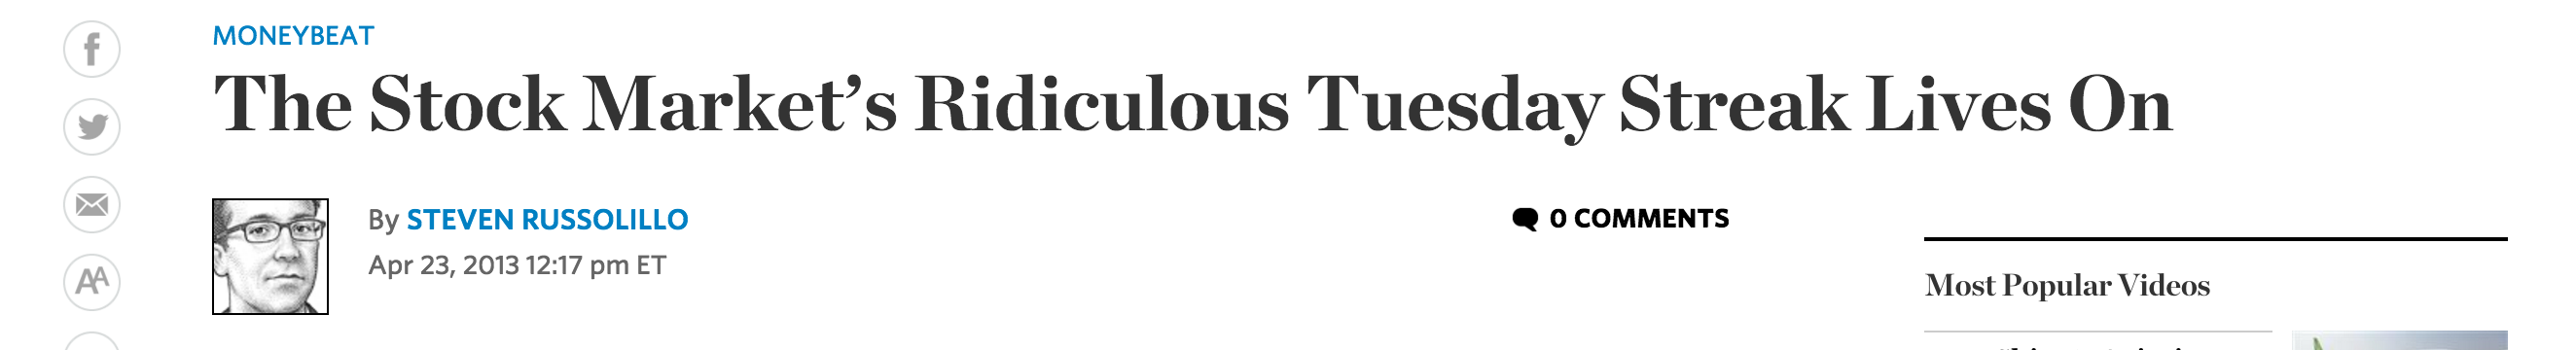

In [93]:
from IPython.display import Image
Image(filename='img/wsj_turnaround_tuesday.png') 

In [94]:
import pandas as pd

In [95]:
sp500 = pd.read_csv("data/table.csv", index_col=0, parse_dates=True)

In [97]:
def rel_change(x):
    return (x[0] - x[1])/x[1]

In [115]:
sptt = sp500[['Adj Close']]

In [119]:
sptt = sptt.assign(UpDown=sptt.rolling(window = 2,center=False).apply(rel_change))

In [122]:
sptt.UpDown = sptt.UpDown.shift(-1)

In [124]:
sptt['day_num'] = sptt.index.dayofweek

In [126]:
sptt["Adj Close"].groupby(sptt.index.dayofweek).mean()

Date
0    478.334693
1    487.397694
2    487.905133
3    485.221006
4    484.926614
Name: Adj Close, dtype: float64

### Let's get more specific with the "Turning Tuesday Hypothesis":

We'll say a "down market" is a market where there are three or more days in a row where the market closes lower than it started. So, for example, for a Thursday, we are interested in what has happened on the three previous tradings days (typically the Monday, Tuesday, and Wednesday directly preceding the Thursday). With that as the definition of a "down market", the question is then, 'When we are in a down market, do we return to an up market more frequently on a Tuesday than on other days of the week?'

In [127]:
def last_three_days_down(x):
    if x[1]<=0 and x[2]<=0 and x[3]<=0:
        return 1
    else:
        return 0

In [134]:
sptt['ltdd'] = sptt[['UpDown']].rolling(window=4 , center=False).apply(last_three_days_down).shift(-3)

In [137]:
import numpy as np

In [138]:
sptt['turned'] = (sptt['ltdd'] > 0.) & (sptt['UpDown'] > 0.)

In [139]:
sptt.head()

,Adj Close,UpDown,day_num,ltdd,turned
Date,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True
2016-01-08,1922.030029,-0.010838,4,0.0,False
2016-01-07,1943.089966,-0.023700,3,0.0,False
2016-01-06,1990.260010,-0.013115,2,0.0,False
2016-01-05,2016.709961,0.002012,1,1.0,True


In [183]:
sp_turning_days_totals = sptt.turned.groupby(sptt.index.dayofweek).sum()

In [159]:
sptt["no_of_dayth"] = sptt.index.day_name()

In [170]:
sp_turning_days_totals = sptt.turned.groupby(sptt["no_of_dayth"]).sum()

In [173]:
sp_turning_days_totals

no_of_dayth
Friday       198.0
Monday       142.0
Thursday     193.0
Tuesday      256.0
Wednesday    223.0
Name: turned, dtype: float64

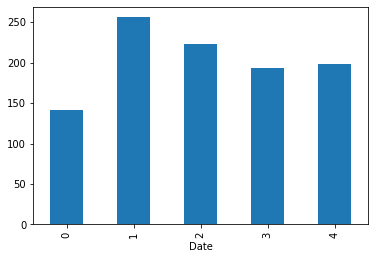

In [184]:
sp_turning_days_totals.plot(kind = 'bar')

In [167]:
sptt.head()

,Adj Close,UpDown,day_num,ltdd,turned,no_of_dayth
Date,,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True,Monday
2016-01-08,1922.030029,-0.010838,4,0.0,False,Friday
2016-01-07,1943.089966,-0.023700,3,0.0,False,Thursday
2016-01-06,1990.260010,-0.013115,2,0.0,False,Wednesday
2016-01-05,2016.709961,0.002012,1,1.0,True,Tuesday


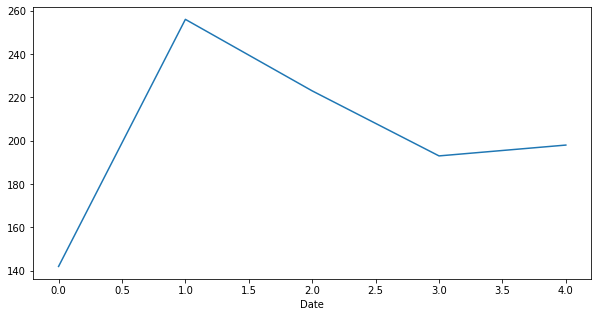

In [145]:
sp_turning_days_totals.plot(figsize=(10,5))

In [169]:
sp_turning_days_totals

Date
0    142.0
1    256.0
2    223.0
3    193.0
4    198.0
Name: turned, dtype: float64

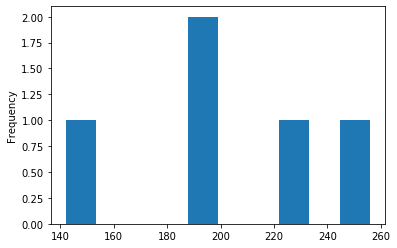

In [172]:
sp_turning_days_totals.plot(kind='hist')